This is for using 4 channels, one brightfield and 3 fluorescent in the autoencoder.

### This is using compensated images
- Data directory: '/media/cjw/Data/cyto/mmFromTifs3/'
- Checkpoint directory;: "/media/cjw/Data/cyto/Checkpoints/2018-04-17-Chs-0-1-2-4_32_mmFromTifs3/checkpoint-2018-04-17-10-18-24/"
- Checkpoint file: 'autoencoder-256x-13980.meta'

In [1]:
import sys

In [2]:
sys.executable

'/home/cjw/anaconda3/bin/python'

In [3]:
'''
Import the modules that will be used
'''

import sys
import warnings
from distutils.version import LooseVersion
import os

import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#import hdbscan

import holoviews as hv
from autoencoder import network
from autoencoder import utils

import umap
%matplotlib inline
%pwd

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'/home/cjw/Code/DeepLearning/autoencoder/Snail_no_bact'

In [4]:
tf.__version__

'1.10.1'

In [5]:
datadir =  '/media/cjw/Data/cyto/Snail_No_Bact/'
#datadir =  '/media/cjw/Data/cyto/ChannelOne/'

#cp_dir = '/home/cjw/disk2cjw/PythonLib/cjwdeeplearning/autoencoder/checkpoint-2018-03-19-11-19-18/'

# cp_dir = "/media/cjw/Data/cyto/Checkpoints/2018-05-22-Denoise/checkpoint-2018-05-22-16-05-11/"
# aemeta = 'autoencoder-256x-56200.meta'
cp_dir = "/media/cjw/Data/cyto/Checkpoints/2018-10-31-Snail/checkpoint-2018-11-01-18-06-10/"
aemeta = 'autoencoder-256x-29680.meta'
if os.path.exists(cp_dir + aemeta):
    print("OK")

OK


In [9]:
'''
Define the neural network that was used and define hyper-parameters.
These are needed to infer from the saved network checkpoint
'''

tf.reset_default_graph()
                  
print(cp_dir)

if os.path.exists(cp_dir):
    print("OK, exists")
else:
    print("Oh no")
#checkpoint-2018-03-02-16-31-42/'
p_width = 32
p_height = 32
p_nchannels = 3
p_channels = [0,2, 4]
p_nepochs = 40
p_batchsize = 128
p_learning_rate = 0.0002  #.00005
p_restore = False
p_latent_size = 256
p_droprate = 0.95
p_stdev = .04

enc_sizes = [(128, 3), (256, 3), (512, 3)] 
#enc_sizes = [(128, 3), (256, 3), (512,3), (1024,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
# enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)]
# dec_sizes = list(reversed(enc_sizes))

# images = tf.placeholder(tf.float32, (None, p_height, p_width, p_nchannels))
# z = tf.placeholder(tf.float32, (None, p_latent_size))

# enc = network.encoder(images, p_latent_size, droprate=p_droprate, is_train=False,
#                       nfilters=enc_sizes)
# sdd = network.decoder(enc, nchannels=p_nchannels, width=p_width, droprate=p_droprate,
#                       is_train=False, nfilters=dec_sizes)

# loss, _, _ = network.ae_loss(images, sdd)

# opt = network.model_opt(loss, p_learning_rate)

# saver = tf.train.Saver()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cp_dir + aemeta)
saver.restore(sess, cp_dir + aemeta.split('.')[0])


/media/cjw/Data/cyto/Checkpoints/2018-10-31-Snail/checkpoint-2018-11-01-18-06-10/
OK, exists
INFO:tensorflow:Restoring parameters from /media/cjw/Data/cyto/Checkpoints/2018-10-31-Snail/checkpoint-2018-11-01-18-06-10/autoencoder-256x-29680


In [10]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    try:
        print(op.name, op.outputs, len(op.outputs))
    except:
        print(op.name, "no output")
    print('------')

init [] 0
------
Placeholder [<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>] 1
------
Placeholder_1 [<tf.Tensor 'Placeholder_1:0' shape=(?, 256) dtype=float32>] 1
------
filter_00/kernel/Initializer/truncated_normal/shape [<tf.Tensor 'filter_00/kernel/Initializer/truncated_normal/shape:0' shape=(4,) dtype=int32>] 1
------
filter_00/kernel/Initializer/truncated_normal/mean [<tf.Tensor 'filter_00/kernel/Initializer/truncated_normal/mean:0' shape=() dtype=float32>] 1
------
filter_00/kernel/Initializer/truncated_normal/stddev [<tf.Tensor 'filter_00/kernel/Initializer/truncated_normal/stddev:0' shape=() dtype=float32>] 1
------
filter_00/kernel/Initializer/truncated_normal/TruncatedNormal [<tf.Tensor 'filter_00/kernel/Initializer/truncated_normal/TruncatedNormal:0' shape=(3, 3, 3, 128) dtype=float32>] 1
------
filter_00/kernel/Initializer/truncated_normal/mul [<tf.Tensor 'filter_00/kernel/Initializer/truncated_normal/mul:0' shape=(3, 3, 3, 128) dtype=float32>] 1
------
fil

gradients/Mean_grad/Maximum/y [<tf.Tensor 'gradients/Mean_grad/Maximum/y:0' shape=() dtype=int32>] 1
------
gradients/Mean_grad/Maximum [<tf.Tensor 'gradients/Mean_grad/Maximum:0' shape=(4,) dtype=int32>] 1
------
gradients/Mean_grad/floordiv [<tf.Tensor 'gradients/Mean_grad/floordiv:0' shape=(4,) dtype=int32>] 1
------
gradients/Mean_grad/Reshape [<tf.Tensor 'gradients/Mean_grad/Reshape:0' shape=(?, ?, ?, ?) dtype=float32>] 1
------
gradients/Mean_grad/Tile [<tf.Tensor 'gradients/Mean_grad/Tile:0' shape=(?, ?, ?, ?) dtype=float32>] 1
------
gradients/Mean_grad/Shape_2 [<tf.Tensor 'gradients/Mean_grad/Shape_2:0' shape=(4,) dtype=int32>] 1
------
gradients/Mean_grad/Shape_3 [<tf.Tensor 'gradients/Mean_grad/Shape_3:0' shape=(1,) dtype=int32>] 1
------
gradients/Mean_grad/Const [<tf.Tensor 'gradients/Mean_grad/Const:0' shape=(1,) dtype=int32>] 1
------
gradients/Mean_grad/Prod [<tf.Tensor 'gradients/Mean_grad/Prod:0' shape=() dtype=int32>] 1
------
gradients/Mean_grad/Const_1 [<tf.Tensor 

gradients/mul_1_grad/Mul_1 [<tf.Tensor 'gradients/mul_1_grad/Mul_1:0' shape=(?, 8, 8, 256) dtype=float32>] 1
------
gradients/mul_1_grad/Sum_1 [<tf.Tensor 'gradients/mul_1_grad/Sum_1:0' shape=<unknown> dtype=float32>] 1
------
gradients/mul_1_grad/Reshape_1 [<tf.Tensor 'gradients/mul_1_grad/Reshape_1:0' shape=() dtype=float32>] 1
------
gradients/mul_1_grad/tuple/group_deps [] 0
------
gradients/mul_1_grad/tuple/control_dependency [<tf.Tensor 'gradients/mul_1_grad/tuple/control_dependency:0' shape=(?, 8, 8, 256) dtype=float32>] 1
------
gradients/mul_1_grad/tuple/control_dependency_1 [<tf.Tensor 'gradients/mul_1_grad/tuple/control_dependency_1:0' shape=() dtype=float32>] 1
------
gradients/AddN_6 [<tf.Tensor 'gradients/AddN_6:0' shape=(?, 8, 8, 256) dtype=float32>] 1
------
gradients/filter_01/BiasAdd_grad/BiasAddGrad [<tf.Tensor 'gradients/filter_01/BiasAdd_grad/BiasAddGrad:0' shape=(256,) dtype=float32>] 1
------
gradients/filter_01/BiasAdd_grad/tuple/group_deps [] 0
------
gradients

In [11]:
images = sess.graph.get_tensor_by_name('Placeholder:0')
enc = sess.graph.get_tensor_by_name('latent_space/BiasAdd:0')
sdd = sess.graph.get_tensor_by_name('Sigmoid:0')


In [12]:
#datadir = "/media/cjw/Data/cyto/mmFromTifs/"
#datadir = "/home/cjw/disk2cjw/Data/yeast/"
mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    #print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/Snail_No_Bact/snail2_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail3_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail5_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail4_no_bact.mm', '/media/cjw/Data/cyto/Snail_No_Bact/snail1_no_bact.mm']
48150


dict_keys(['snail2_no_bact.mm', 'snail3_no_bact.mm', 'snail5_no_bact.mm', 'snail4_no_bact.mm', 'snail1_no_bact.mm'])

In [13]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    #print(n)
    file = n*[key[0:-3].lower()]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    xdf = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(xdf)
    
alldf = pd.concat(dataframes, ignore_index=True)
trts = list()
runs = list()

for row in range(len(alldf)):
    file = alldf.iloc[row]['file']
    if '_ice' in file.lower():
        treatment = 'ice'
    elif '_ccb'in file.lower():
        treatment = 'ccb'
    else:
        treatment = "untreated"
    trts.append(treatment)
    runs.append(file[0:5])

alldf['treatment'] = trts
alldf['run'] = runs


In [10]:
cmapdf = pd.read_pickle('/media/cjw/Data/cyto/map.pickle')
alldf = alldf.merge(cmapdf, on=['file', 'fid'])
alldf = alldf[alldf['cid'] != -1]

clustermap = pd.read_pickle('/media/cjw/Data/cyto/cluster_map.pickle')
alldf = alldf.merge(clustermap, on=['file', 'cid'])
print(alldf.head())
myclustermap = pd.read_pickle('/media/cjw/Data/cyto/my_cluster_map.pickle')
alldf = alldf.merge(myclustermap, on=['file', 'fid'])
print(len(alldf))
print(alldf.head())

   id  fid       file        mmfile  plate  row  column  field  yc  xc  well  \
0   0    0  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
1   1    1  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
2   2    2  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
3   3    3  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
4   4    4  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   

  treatment    run  cid  clusterId  
0       ccb  fish3    0      26874  
1       ccb  fish3    1      26874  
2       ccb  fish3    2      26855  
3       ccb  fish3    3      26874  
4       ccb  fish3    4      26851  
169599
   id  fid       file        mmfile  plate  row  column  field  yc  xc  well  \
0   0    0  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
1   1    1  fish3_ccb  Fish3_CCB.mm      0    0       0      0  32  32     0   
2   2    2  fish3_ccb  Fish3_CCB.mm      0    0   

In [14]:

df = alldf.sample(frac=.2)
df = df.reset_index()
print(len(df))
df.tail()

9630


,index,column,fid,field,file,id,mmfile,plate,row,well,xc,yc,treatment,run
9625,32410,0,3898,0,snail4_no_bact,32410,snail4_no_bact.mm,0,0,0,32,32,untreated,snail
9626,13293,0,3672,0,snail3_no_bact,13293,snail3_no_bact.mm,0,0,0,32,32,untreated,snail
9627,4101,0,4101,0,snail2_no_bact,4101,snail2_no_bact.mm,0,0,0,32,32,untreated,snail
9628,20350,0,1800,0,snail5_no_bact,20350,snail5_no_bact.mm,0,0,0,32,32,untreated,snail
9629,39210,0,912,0,snail1_no_bact,39210,snail1_no_bact.mm,0,0,0,32,32,untreated,snail


In [12]:
# import pickle
# cmapdf = pd.read_pickle('/media/cjw/Data/cyto/map.pickle')
# cmapdf.tail()

In [13]:
# testdf = alldf.merge(cmapdf, on=['file', 'fid'])
# len(testdf), len(alldf)

In [14]:
sns.set_style("whitegrid", {'axes.grid' : False})
len(df)

4815

In [15]:
'''Read the images, display image, encode and show latent space, show decoded'''

vv = utils.getWell(mmdict,
                    df, p_width, 0, 0, p_nchannels, channels=p_channels)

nvv = len(vv)
offloc = 0
offstep = 1000
offnext = offloc + offstep
xhe = np.zeros((nvv, p_latent_size))
xdd = np.zeros((nvv, p_width, p_height, p_nchannels))
while offloc < nvv:
    #print(offloc, offnext)
    xhe[offloc:offnext] = sess.run(enc, feed_dict={images:vv[offloc:offnext]})
    xdd[offloc:offnext] = sess.run(sdd, feed_dict={enc:xhe[offloc:offnext]})
    offloc = offnext
    offnext += offstep
    if offnext > nvv:
        offnext = nvv
        


In [41]:
embedding = umap.UMAP(n_neighbors=10, min_dist=0.001,
                      n_components=32,
                      metric='euclidean').fit_transform(xhe)

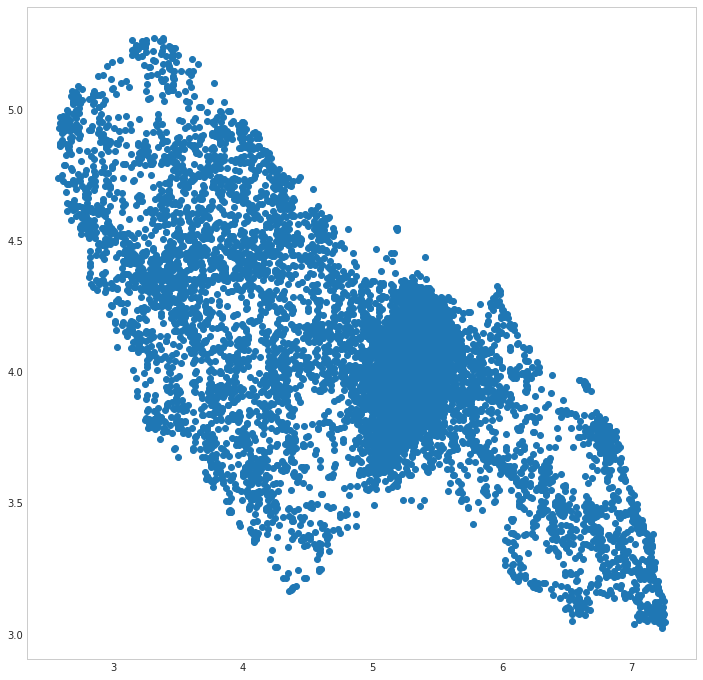

In [42]:

plt.figure(figsize=(12,12))
plt.scatter(embedding[:,0], embedding[:,1])

In [43]:
nclust = 22
from sklearn import cluster, mixture
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

km = cluster.KMeans(n_clusters=nclust).fit_predict(embedding)
agc = cluster.AgglomerativeClustering(n_clusters=nclust, affinity='euclidean', linkage="ward").fit_predict(embedding)
_, dbs = cluster.dbscan(embedding, eps=.5,min_samples=5, metric='euclidean')
#gmm = BayesianGaussianMixture(nclust, covariance_type='full')
#gmm.fit(embedding)
#gm = gmm.predict(embedding)
print(dbs.max())

2


(array([ 1215761.,  8599209., 12033336.,  9194720.,  9304405.,  2959526.,
         1231146.,  1142765.,   588621.,    94146.]),
 array([3.21319448e-03, 6.98945108e-01, 1.39467702e+00, 2.09040894e+00,
        2.78614085e+00, 3.48187276e+00, 4.17760468e+00, 4.87333659e+00,
        5.56906851e+00, 6.26480042e+00, 6.96053233e+00]),
 <a list of 10 Patch objects>)

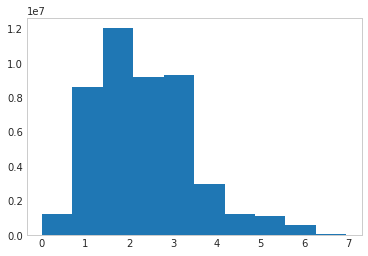

In [44]:
from scipy.spatial.distance import pdist

pd = pdist(embedding)

plt.hist(pd)

[2.4757116  0.27258575 0.12923947 0.12181855]
(4, 32)


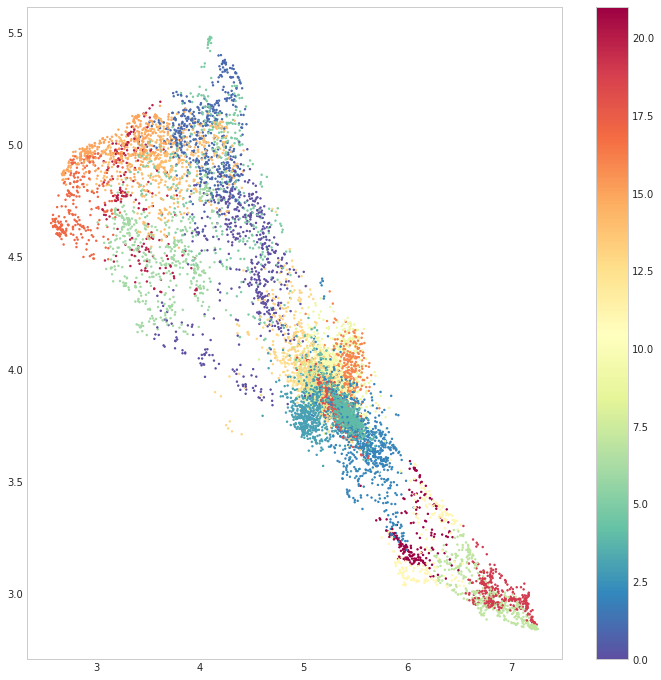

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, svd_solver='arpack', whiten=True, copy=True)
gfit = pca.fit_transform(embedding)
print(pca.explained_variance_)
print(pca.components_.shape)

df['agc'] = agc
df['dbs'] = dbs
plt.figure(figsize=(12,12))
plt.scatter(embedding[:,0], embedding[:,4], 2, agc, cmap='Spectral_r')
plt.colorbar()

In [ ]:
f = plt.figure(figsize=(12, 40))
print(xhe.shape, xdd.shape)
print(np.amin(vv),np.amax(vv))
for i in range(5):
    ix = np.random.randint(0, len(vv))
    #print(ix)
    plt.subplot(20,6,i*6 + 1)
    plt.imshow(vv[ix,:,:,0], cmap='gray')
    plt.subplot(20,6,i*6 + 2)
    plt.imshow(vv[ix,:,:,1], cmap='viridis')
    plt.subplot(20,3,i*3 + 2)
    plt.plot(xhe[ix])
    plt.subplot(20,6,i*6 + 5)
    plt.imshow(xdd[ix,:,:,0], cmap='gray')
    plt.subplot(20,6,i*6 + 6)
    plt.imshow(xdd[ix,:,:,1], cmap='viridis')
   

In [ ]:
def one_imshow(image, r, c, ic, cmap):
    plt.subplot(16, 5, ic)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')

ic = 1

nrows = 16
plt.figure(figsize=(16,2*nrows))

for i in range(nrows):
    ix = np.random.randint(0, len(vv))
    one_imshow(vv[ix,:,:,0], nrows, 9, ic, 'gray')
    ic += 1
    
    one_imshow(vv[ix,:,:,1], nrows, 9, ic, 'viridis')
    ic += 1
    ic += 1
    
    one_imshow(xdd[ix,:,:,0], nrows, 9, ic, 'gray')
    ic += 1
    
    one_imshow(xdd[ix,:,:,1], nrows, 9, ic, 'viridis')
    ic += 1

#plt.savefig('/media/cjw/Data/cyto/output/decoded.png')

In [26]:
'''Encode the images with the trained network and store the latent spaces in an array'''

dv = {0:(0,0)}
dimages = dict()
counter = 0
one = 0
for k in dv.keys():
    i, j = dv[k]
    print(i, j)
    r = i + 1
    cm = j + 1
    try:
        k = vv #utils.getWell(mmdict,df, width, 0, 0, nchannels, channels=[0])
        print(len(k))
    except:
        print("Oh no!!")
        continue
    hek = xhe #sess.run(enc, feed_dict={images:k})
    print('hek', hek.shape)
    dimages[counter] = k
    if one == 0:
        one = 1
        g = hek
        colors = np.zeros(k.shape[0])
        counter += 1
        print(i, j, g.shape, hek.shape)
    else:
        print(i, j, g.shape, hek.shape)
        g = np.concatenate((g,hek))
        colors = np.concatenate((colors, counter + np.zeros(k.shape[0])))
        counter += 1

g_all = g
g_all.shape

0 0
4815
hek (4815, 256)
0 0 (4815, 256) (4815, 256)


(4815, 256)

In [27]:
#from sklearn.preprocessing import normalize
#g_all = normalize(g_all, axis=1)

In [28]:
''' Create some colors for display later on'''

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
clist = [(.2,.2,.2),
         (172/255,25/255,210/255),
         (255/255, 165./255, 0),
         (44/255,25/255,210/255),
         (134/255, 165./255, 56/255),
         (26/255,188/255,255/255),
         (188/255,255/255, 26/255),
         (1, 0,0), (0,1,0), (0,0,1)]

mycmap = LinearSegmentedColormap.from_list(
        'mycmap', clist, N=len(clist))

bounds = np.linspace(0, len(clist), len(clist) + 1)
norm = mpl.colors.BoundaryNorm(bounds, mycmap.N)
print(bounds, mycmap.N)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 10


In [46]:
'''Do PCA on the latent space features'''

from sklearn.decomposition import PCA
pca = PCA(n_components=64, svd_solver='arpack', whiten=True, copy=True)
gfit = pca.fit_transform(g_all)
print(gfit.shape)
print(pca.explained_variance_)
print(pca.components_.shape)


NameError: name 'g_all' is not defined

In [47]:
order = ['ccb', 'ice', 'untreated']
order=None

#df['gm'] = gm
df['agc'] = agc
df['km'] = km

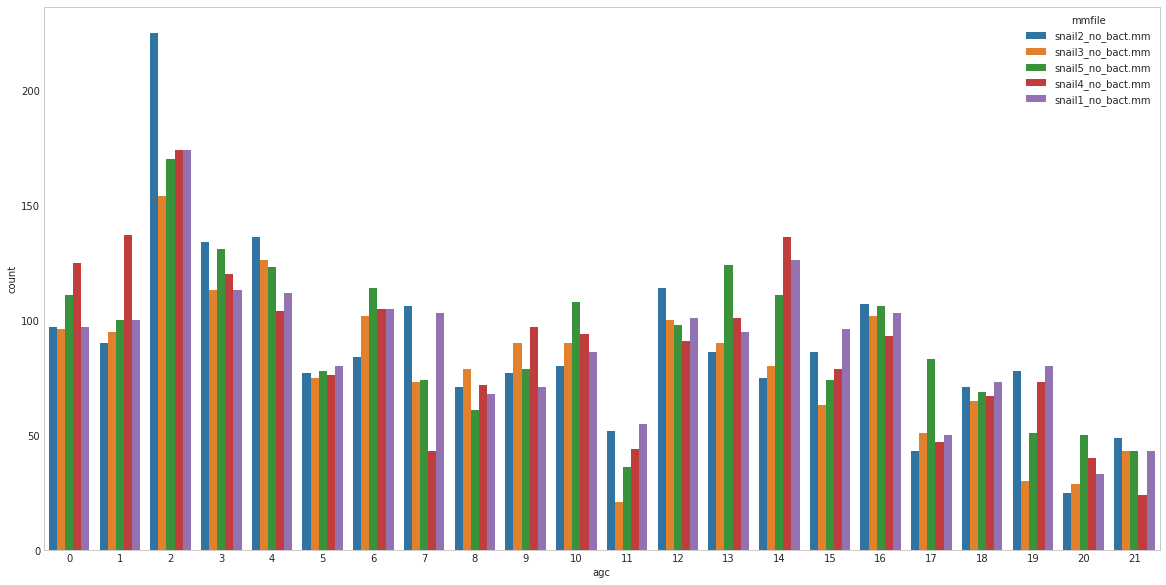

In [48]:


plt.figure(figsize=(20,10))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.countplot(x='agc', data=df, hue='mmfile', hue_order=order)

22


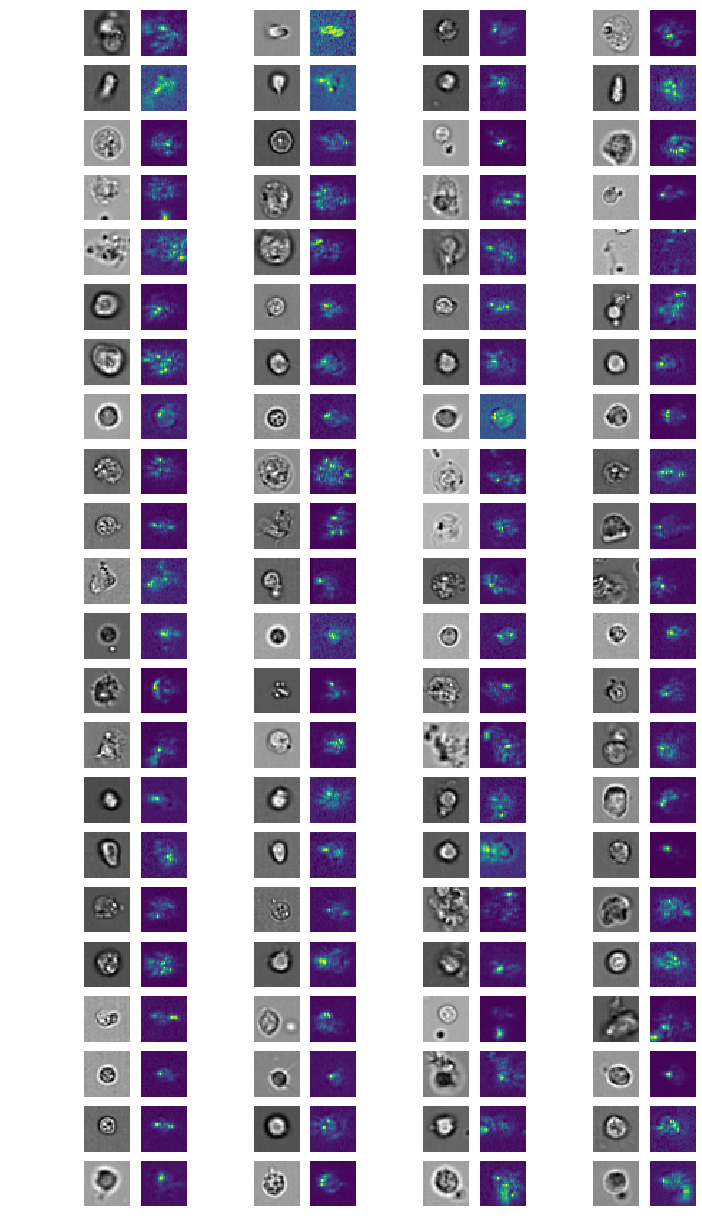

In [49]:
ximages = vv
ucly = sorted(df['agc'].unique())
print(len(ucly))
cly = df['agc'].values
nk = len(ucly) #nclust
plt.figure(figsize=(12, 1.*nk))
plt.ion()
counter = 1
shift = 0
for k in ucly:
    rowdf = df[df['agc'] == k]
    inum = list(rowdf.index)
    
#     gk = g_all[cly == k]
#     gavk = np.mean(gk, axis=0)
#     gavk = np.expand_dims(gavk.squeeze(), axis=0)
#     resav = sess.run(sdd, feed_dict={enc:gavk})
#     plt.subplot(nk, 12, counter)
#     plt.imshow(resav.squeeze()[0])
#     plt.text(8, 12,str(k), fontsize=36, color='black')
#     counter += 1
    plt.subplot(nk, 16, counter)
    plt.text(0.5,0.5, str(k)[2:], fontsize=12, color='black')
    plt.axis('off')
    counter += 1
    for i in range(4):
        
        try:
            plt.subplot(nk, 12, counter)
            rnd = inum[np.random.randint(0,len(inum))]
            plt.imshow(ximages[rnd,:,:,0], cmap='gray')
            plt.axis('off')
            counter += 1
            plt.subplot(nk, 12, counter)
            plt.imshow(ximages[rnd,:,:,1], cmap='viridis')
            plt.axis('off')
#             plt.text(5, 5,str(rnd), fontsize=20, color='white')
            counter += 1
            
        except Exception as e:
            print(e)
            plt.imshow(np.zeros((64,64)), cmap='gray')
            counter += 1
        if i < 3:
            counter += 1

-------------------------------------------------------------------------

In [74]:
import matplotlib 
def display_cluster(cluster_num, nrows=16, outfile=None, c=None, df=None):
    
    if outfile:
        plt.ioff()
    tn = cluster_num
    images4 = ximages[c == tn]
    g4 = embedding[c == tn]
    gxhe = xhe[c == tn]
    fig = plt.figure(figsize=(16,1.6*1.5*nrows))
    #print(images4.shape)

#     gtest = np.mean(g4, axis=0)
#     gtest = np.expand_dims(gtest.squeeze(), axis=0)
#     res = sess.run(sdd, feed_dict={enc:gtest})

#     gav = np.mean(g_all, axis=0)
#     gav = np.expand_dims(gav.squeeze(), axis=0)
#     resav = sess.run(sdd, feed_dict={enc:gav})

    ppi = 0
    
    b = g4.mean(axis=0)
    d = gxhe.mean(axis=0)

    for i in range(nrows):
        ix = np.random.randint(0, len(g4))
        plt.subplot(nrows,8,i*8 + 1)
        plt.imshow(images4[ix,:,:,0], cmap='gray')
        plt.axis('off')

        plt.subplot(nrows,8,i*8 + 2)
        plt.imshow(images4[ix,:,:,1], cmap='viridis')
        plt.axis('off')

        plt.subplot(nrows,8,i*8 + 3)
        plt.imshow(images4[ix,:,:,2], cmap='viridis')
        plt.axis('off')
        
        plt.subplot(nrows, 4, i*4 + 3)
        plt.plot(g4[ix]*0, color='gray')
        plt.plot(g4[ix])
        plt.subplot(nrows, 4, i*4 + 4)
        plt.plot(gxhe[ix]*0, color='gray')
        plt.plot(gxhe[ix])

    #     plt.xticks([])
    #     plt.yticks([])
        plt.axis('off')
        ppi += 2
    
    if df is not None:
        ax = plt.subplot(2,2,2)
        plt.scatter(df['tsneX'], df['tsneY'], 16, gm, cmap='tab20c')
        xdf = df[df['gm'] == cluster_num]
        plt.scatter(xdf['tsneX'], xdf['tsneY'], label=cluster_num, s=24, color='yellow')
        ax.axis('equal')
    if outfile:
        #fig = matplotlib.pyplot.gcf()
        #fig.set_size_inches(4, 10)
        #fig.savefig('test2png.png', dpi=100)
        plt.savefig(outfile, dpi=100, bbox_inches='tight', pad_inches=.1)
        plt.clf()
        plt.close(fig)
    
    plt.ion()

    return b, d

In [30]:
for i in range(nclust):
    outfile = "/media/cjw/Data/cyto/TalkOutput/gm_cluster_" + str(i).zfill(3) + ".png"
    display_cluster(i, 10, outfile=outfile, c=gm)

NameError: name 'gm' is not defined

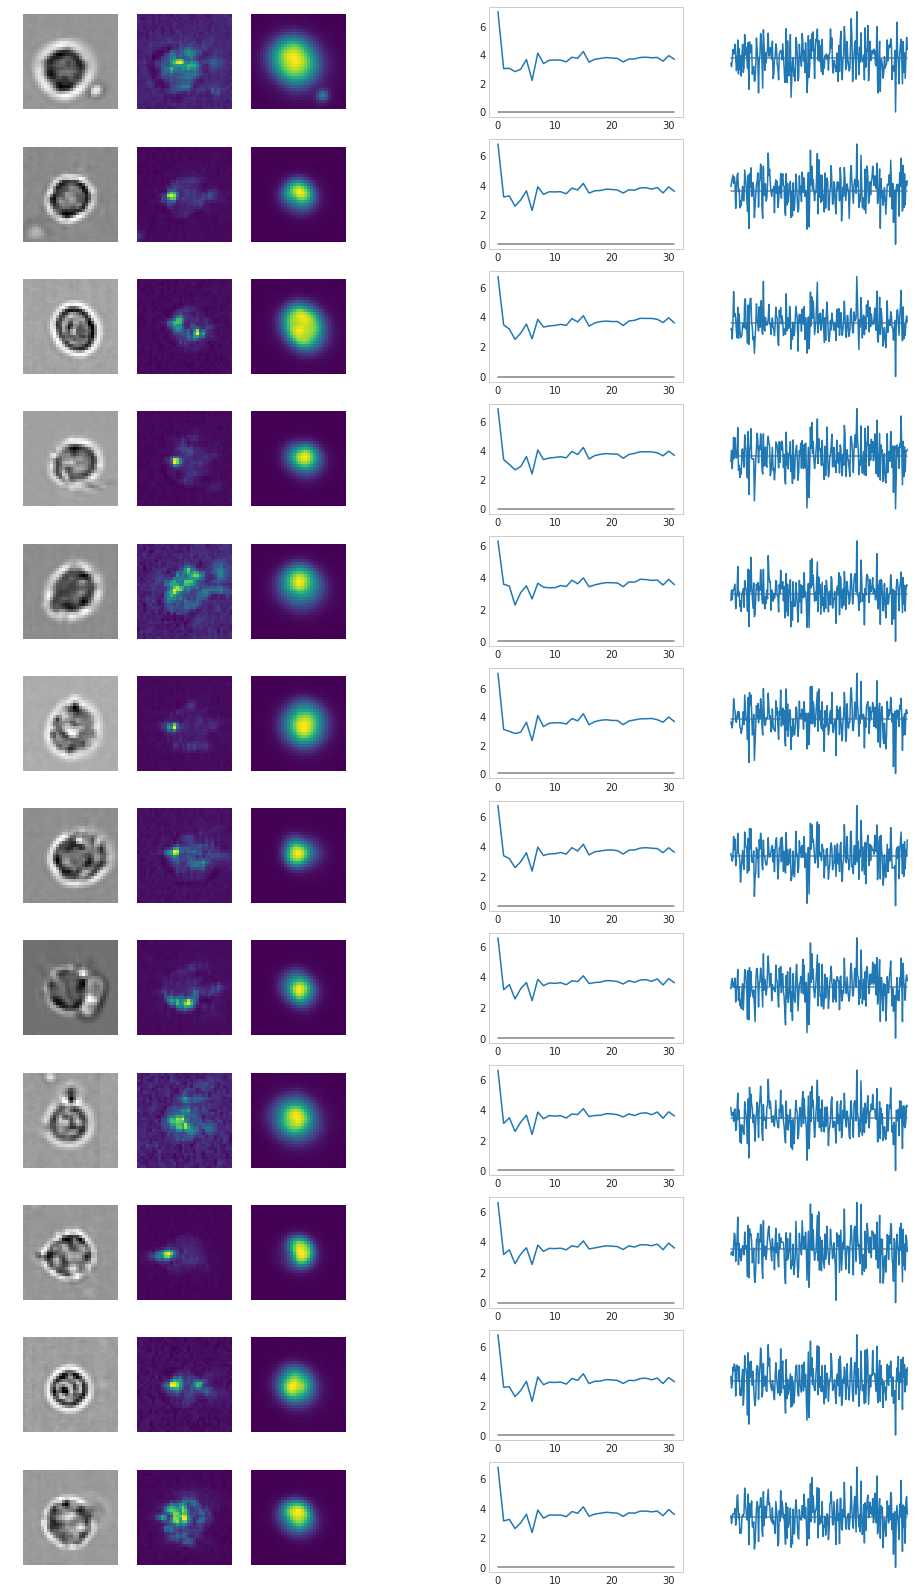

In [118]:
ba1, da1 = display_cluster(7, 12, outfile=None, c=agc)

(1, 32, 32, 3)


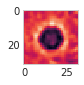

In [119]:

evag= sdd.eval({enc:np.expand_dims(da1, axis=0)}, sess)
print(evag.shape)
plt.figure(figsize=(1,1))
plt.imshow(evag[0,:,:,0])

In [310]:
from sklearn.manifold import TSNE

# geez = list()
# ceez = list()
# cindex = 0
# for i in (16,17, 18,19):
#     gna = g_all[agc == i]
#     ca = cindex #np.array(clist[cindex])
#     cna = np.repeat([i], gna.shape[0], axis=0)
#     geez.append(gna)
#     ceez.append(cna)
#     cindex += 1
# # c3 = gn3.shape[0]*(1, 0, 0)
# # c6 = gn3.shape[0]*(0, 1, 0)
# # c10 = gn3.shape[0]*(0, 0, 1)
# gn = np.concatenate(geez)
# cn = np.concatenate(ceez)
# cn = np.concatenate((c3, c6, c10))
#print(gn.shape)
# g_emb = TSNE(n_components=2,perplexity=25).fit_transform(embedding.astype(np.float64))
g_emb = umap.UMAP(n_neighbors=10, min_dist=0.001,
                      n_components=2,
                      metric='correlation').fit_transform(embedding)
print(g_emb.shape)



(9630, 2)


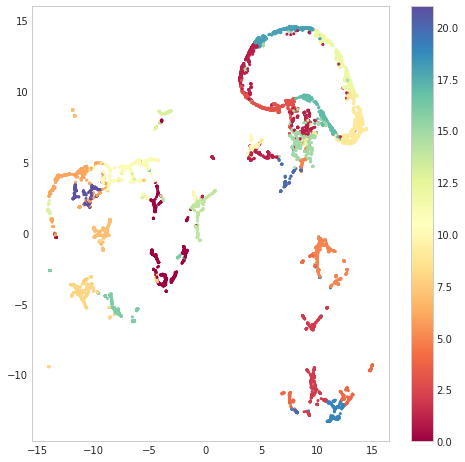

In [311]:
plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
plt.scatter(g_emb[:,0], g_emb[:,1], 4, agc, cmap='Spectral')
plt.colorbar()

# plt.subplot(4,1,2)
# plt.scatter(g_emb[:,0], g_emb[:,1], 8, gm1, cmap='tab20c')
# plt.colorbar()

# plt.subplot(2,1,2)
# plt.scatter(g_emb[:,0], g_emb[:,1], 8, agc, cmap='tab20c')
# plt.colorbar()

# plt.subplot(4,1,4)
# plt.scatter(g_emb[:,0], g_emb[:,1], 8, km, cmap='tab20c')
# plt.colorbar()

In [ ]:

df['tsneX'] = g_emb[:,0]
df['tsneY'] = g_emb[:,1]
#df['gm'] = gm

#plt.ioff()
print(type(cly))
plt.figure(figsize=(16,16))
for index, i in enumerate(np.unique(cly)): #range(nclust):
#         plt.figure(figsize=(16,16))
        #ax = df[df['agc'] != i].plot.scatter('tsneX', 'tsneY', label=i, s=4, color=gm, figsize=(6,6))
        print(index, i)
        ax = plt.subplot(7,4, index + 1)
        ax.scatter(df['tsneX'], df['tsneY'], 16, cly, cmap='tab20c')
        xdf = df[df['clusterId_y'] == i]
        ax.scatter(xdf['tsneX'], xdf['tsneY'], label=i, s=24, color='yellow')
        ax.axis('equal')
        outfile = "/media/cjw/Data/cyto/TalkOutput/tsne_gm_" + str(i).zfill(3) + ".png"
        #break
        #plt.savefig(outfile, dpi=100, bbox_inches='tight', pad_inches=.1)
        #plt.clf()
        #plt.close()
#plt.ion()

In [ ]:
df['tsneX'] = g_emb[:,0]
df['tsneY'] = g_emb[:,1]
#df['gm'] = gm

#plt.ioff()

plt.figure(figsize=(16,16))
for i in range(nclust):
#         plt.figure(figsize=(16,16))
        #ax = df[df['agc'] != i].plot.scatter('tsneX', 'tsneY', label=i, s=4, color=gm, figsize=(6,6))
        ax = plt.subplot(7,4, i + 1)
        ax.scatter(df['tsneX'], df['tsneY'], 16, agc, cmap='tab20c')
        xdf = df[df['agc'] == i]
        ax.scatter(xdf['tsneX'], xdf['tsneY'], label=i, s=24, color='yellow')
        ax.axis('equal')
        outfile = "/media/cjw/Data/cyto/TalkOutput/tsne_gm_" + str(i).zfill(3) + ".png"
        #break
        #plt.savefig(outfile, dpi=100, bbox_inches='tight', pad_inches=.1)
        #plt.clf()
        #plt.close()
#plt.ion()


In [92]:
for i in range(nclust):
    outfile = "/media/cjw/Data/cyto/TalkOutput/tsne_gm_cluster_" + str(i).zfill(3) + ".png"
    display_cluster(i, 10, outfile=outfile, c=gm, df=df)
    

In [62]:

c_df = pd.pivot_table(df, values='xc', index=['agc'],
                      columns=['gm'], aggfunc='count').reset_index('agc')
c_df = c_df.fillna(0)

#print(c_df)
#print(c_df.index, type(c_df.index))
mc_df = c_df.melt(id_vars=('agc'))
mc_df = mc_df.fillna(0)
mc_df['value'] = (mc_df['value']/18.)#.astype(np.float64)
mc_df = mc_df.fillna(0)
#print(mc_df)
#plt.figure(figsize=(12,12))


In [63]:
hv.extension('matplotlib')
#%output size=350

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [192]:
%%opts Chord [label_index='index' color_index='index' edge_color_index='value'] 
%%opts Chord (cmap='Category20', edge_cmap='PuBu')


#hv.Chord(mc_df)

In [193]:
%%opts Chord [label_index='index' color_index='index' edge_color_index='value'] 
%%opts Chord (cmap='Category20', edge_cmap='Category20')


%output size=200
tdf = mc_df[mc_df['clusterId_x'] == 26860]
tfd =tdf.fillna(0)


#hv.Chord(tdf)

In [66]:
%%opts Sankey (cmap='bone', edge_cmap='viridis_r')
%%output filename="/media/cjw/sankey.svg" fig='svg'
%output size=200 
def f(h):
    return "{:8.1f}".format(h)

nx = list(mc_df['agc'].unique())
ny = list(mc_df['gm'].unique())
nodes = list()
nodes.extend(nx)
nodes.extend(ny)
nodes = hv.Dataset(enumerate(nodes), ['User Defined', 'AutoEncoder'])
edges = [tuple(x) for x in mc_df.itertuples(index=False)]
#print(nodes)
#print(edges[0])
# hv.Sankey(mc_df).options(label_position='left',
#                          width=600, height=800, 
#                          edge_color_index='clusterId_x')
value_dim = hv.Dimension('Mean', value_format=f)
#plt.figure(figsize=(4,4))
hv.Sankey((edges, nodes), ['UD', 'AE'], vdims=value_dim).options(label_position='left',
                                                                 aspect=.6,
                         #width=600, height=800, label_index='AutoEncoder',
                         edge_color_index='AE')

RecursionError: Sankey diagrams only support acyclic graphs.

[ 8987.  9716.  7001. 15789.   956.  1713.  9759. 32481.   288.  3412.
  1724.  9140.  1989.  3953.  1033.  2806.  1271.  1768.   627.  2780.
 13226.  1062.   305.  4072. 28742.   173.   112.  4714.] (28,)
[1.79309657 1.65915301 1.65664931 4.30452563 3.12418301 4.74515235
 1.99570552 1.81003065 3.46987952 3.08499096 1.76820513 3.5385211
 4.0509165  1.76709879 2.56327543 1.75594493 3.2757732  2.09976247
 2.91627907 1.82414698 3.76166098 2.19875776 3.38888889 3.26805778
 1.99154656 3.14545455 2.43478261 4.00509771] (28,)
[2.79378823 1.96169984 5.72090288 1.24642378 0.95137538 1.20975849
 2.18462257 5.47568389 0.07833712 1.36819707 2.31076332 0.75463879
 0.27075499 0.42346371 0.71198787 2.65106093 5.96458181 4.18306323
 2.9422903  0.74710368 0.17919894 7.53494638 9.31662552 5.11939841
 1.50381934 9.79305048] (26,)
[2.77413067 4.01445451 2.27306704 6.48092829 0.47136684 0.68338467
 4.87906965 7.12611226 0.14423302 0.95598782 0.33635811 5.03482341
 0.86414351 0.98194154 0.62559956 0.6937820

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]), <a list of 26 Text yticklabel objects>)

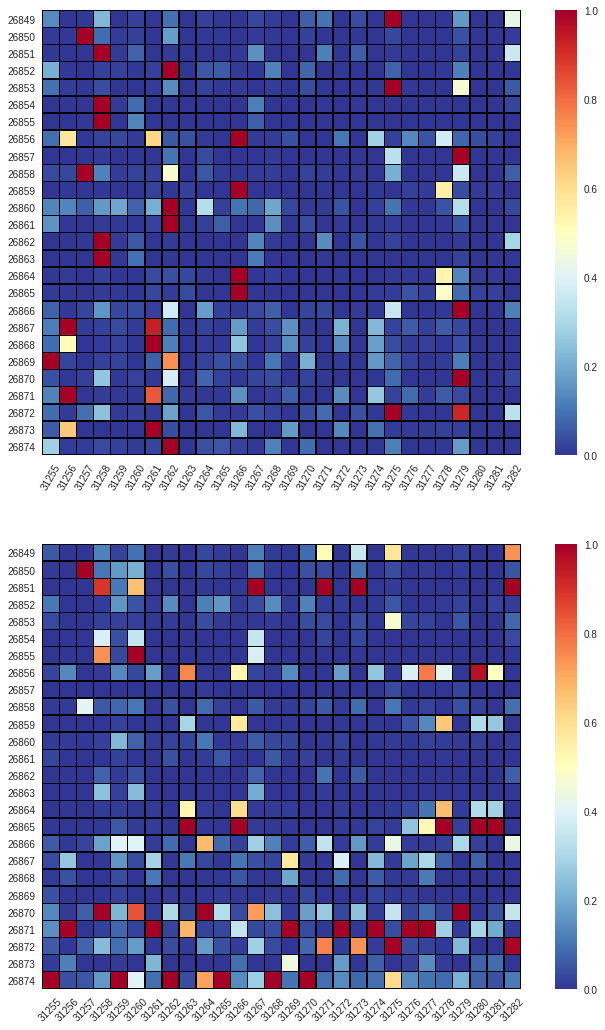

In [245]:
%matplotlib inline
from sklearn.preprocessing import normalize
p_df = pd.pivot_table(alldf, values='xc', index=['clusterId_x'], columns=['clusterId_y'], aggfunc='count')
p_df = p_df.fillna(0)
plt.figure(figsize=(12,18))
v = p_df.values
v0 = normalize(v, axis=0, norm='max')
print(np.sum(v, axis=0), np.sum(v, axis=0).shape)
print(np.sum(v0, axis=0), np.sum(v0, axis=0).shape)
print(np.sum(v0, axis=1), np.sum(v0, axis=1).shape)
v1 = normalize(v, axis=1, norm='max')
print(np.sum(v1, axis=0), np.sum(v1, axis=0).shape)
print(np.sum(v1, axis=1), np.sum(v1, axis=1).shape)
plt.subplot(2,1,1)
sns.heatmap(v1, square=True, xticklabels=p_df.columns, yticklabels=p_df.index, cmap="RdYlBu_r",
           linewidth=.5, linecolor='black', robust=True)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.subplot(2,1,2)
sns.heatmap(v0, square=True, xticklabels=p_df.columns, yticklabels=p_df.index, cmap="RdYlBu_r",
           linewidth=.5, linecolor='black', robust=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)


169599.0

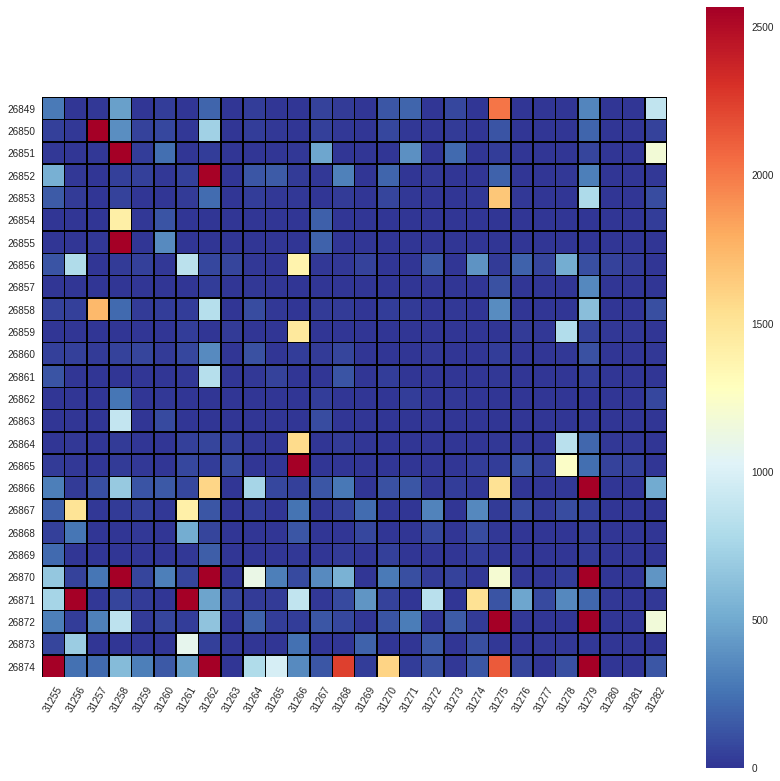

In [263]:
plt.figure(figsize=(14,14))

sns.heatmap(v, square=True, xticklabels=p_df.columns, yticklabels=p_df.index, cmap="RdYlBu_r",
           linewidth=.5, linecolor='black', robust=True)
plt.xticks(rotation=60)
plt.yticks(rotation=0)
np.sum(v)

In [39]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist, cdist

dm =  np.arccos(1 -cdist(g_all,g_all, metric='cosine'))
#dm =  cdist(g_all, g_all, metric='euclidean')
#dm = distance_matrix(mma, mma)
print(dm.shape)

ddict = dict()
for i in range(g_all.shape[0]):
    ri = np.argsort(dm[i])
    ddict[i] = ri[1:13]

dm[1,ddict[1]]

(4500, 4500)


array([0.84650457, 0.89392709, 0.92158811, 0.95054435, 0.95505369,
       0.96474147, 0.98575274, 0.99417142, 1.00281157, 1.01690594,
       1.0258913 , 1.0268415 ])

In [41]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

sc = silhouette_score(dm, labels=gm, metric='precomputed', sample_size=None)
ch = calinski_harabaz_score(g_all, gm)
sc, ch

(0.02651123624465178, 33.53769632381485)

In [93]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors